# 0816050 施雅青

# Outline
## 1. K-means
    1-1 Data Preprocessing
        shuffle
        pca(dimension = 2)
    1-2 Functions
    1-3 Implementing Algorithm
    1-4 Questions - K-means Clustering

## 2. SVM
    2-1 Data Preprocessing
    2-2 Train-Test split
    2-3 Linear kernel
    2-4 polynomial kernel with parameter search
    2-5 rbf kernel with parameter search
    2-6 Questions - Support Vector Machine

## 3. Compare and Conclusion


## K-means

### 1-1 Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import random as rand
from sklearn.decomposition import PCA
import random
from sklearn import metrics
# # ,delimiter="\t"
# ori_data = pd.read_csv(r'seeds_dataset.txt')
# ori_data.to_csv(r'seeds_dataset.csv',index=None)



In [2]:
attribute_m = ['area A','perimeter P','compactness C','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove','class']
df = pd.read_csv('seeds_dataset.csv',names=attribute_m)

In [3]:
# df

In [4]:
df=df.sample(frac=1).reset_index(drop=True)

In [5]:
classes = df['class']

In [6]:
# shuffle
X2 = df.drop('class',axis=1)
X = X2.to_numpy()
classes = classes.to_numpy()
# pca
pca = PCA(n_components=2)
newX = pca.fit_transform(X)

### 1-2 Functions

In [7]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

### 1-3 Implementing Algorithm

In [8]:
def cal_dis(i, j):
    return sum(np.subtract(i,j)**2)

def find_closest_Centroid(centroid, X):
    assign_centroids = []
    for i in X:
        distance = []
        for j in centroid:
            distance.append(cal_dis(i, j))
        assign_centroids.append(np.argmin(distance))
    return np.array(assign_centroids)

def cal_new_centroids(clusters, X):
    new_centroids= []
    new_table = np.concatenate((X, np.expand_dims(clusters, axis=0).T), axis = 1)
    for i in np.unique(new_table[:,2]):
        current_cluster = new_table[new_table[:,2] == i]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean[:-1])
    return new_centroids

final_centroids = []
def kmeans_mine(X, num_clusters):
    init_centroids_idx = random.sample(range(0,210), 3)
    
    centroids = []
    for i in init_centroids_idx:
        centroids.append(X[i])
    centroids = np.array(centroids)
    
    while True:
        get_centroids = find_closest_Centroid(centroids, X)
        yield get_centroids
        
        prev_centroids = centroids
        centroids = cal_new_centroids(get_centroids, X)
        
        if np.array_equal(prev_centroids, centroids):
#             print(centroids)
            for i in range(len(centroids)):
                final_centroids.append(centroids[i])
            return get_centroids

In [9]:

def compute_mean_distance(X, cluster_indices, num_clusters):
    """
    Compute mean L2 distance from data points to their cluster centroids.
    """
    assert X.shape[0] == cluster_indices.shape[0], 'size not matched'

    total = np.zeros([num_clusters, X.shape[1]])
    count = np.zeros([num_clusters])

    for x, c in zip(X, cluster_indices):
        total[c] += x
        count[c] += 1

    count[count == 0] = 1 # avoid zero division when there is nothing in a cluster
    means = total / count[:, np.newaxis]

    distances = np.sqrt(np.power(X - means[cluster_indices], 2).sum(1))
    return distances.mean()


In [10]:
# cluster_indices
k_num = 3
for i, cluster_indices in enumerate(kmeans_mine(newX, k_num)):
    mean_distance = compute_mean_distance(X, cluster_indices, k_num)
    print(f'step: {i}, mean_distance: {mean_distance}')
# print(cluster_indices.shape)
# print(final_centroids)


step: 0, mean_distance: 1.5152746813288924
step: 1, mean_distance: 1.4961313467285484
step: 2, mean_distance: 1.4951654945046562
step: 3, mean_distance: 1.4939726617166735
step: 4, mean_distance: 1.4939726617166735


In [11]:
final_np = np.array(final_centroids)
# print(final_np)

In [12]:
final_label = np.concatenate((X, np.expand_dims(cluster_indices, axis=0).T), axis = 1)

In [13]:
# print(final_label.shape)
final_label_df = pd.DataFrame(final_label)

In [14]:
final_label_df2=final_label_df.set_axis(['area A','perimeter P','compactness C','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove','class'], axis=1, inplace=False)
# print(final_label_df2)
# print(type(final_label_df2))

In [15]:
# print(cluster_indices.shape)
claone =[]
clatwo =[]
clazero=[]
for i in range(210):
#     print(i)
    if cluster_indices[i] == 1 :
        claone.append(classes[i])
    if cluster_indices[i]==2 :
        clatwo.append(classes[i])
    if cluster_indices[i]==0 :
        clazero.append(classes[i])
# print(claone)
# print(clatwo)
# print(clazero)

In [16]:
idx = [0,0,0,0]
for i in claone:
    if i == 1:
        idx[1]+=1
    if i == 2:
        idx[2]+=1
    if i == 3:
        idx[3]+=1
# print(idx)
one_map = np.argmax(idx)
# print(one_map)

In [17]:
idx = [0,0,0,0]
for i in clazero:
    if i == 1:
        idx[1]+=1
    if i == 2:
        idx[2]+=1
    if i == 3:
        idx[3]+=1
# print(idx)
zero_map = np.argmax(idx)
# print(zero_map)

In [18]:
idx = [0,0,0,0]
for i in clatwo:
    if i == 1:
        idx[1]+=1
    if i == 2:
        idx[2]+=1
    if i == 3:
        idx[3]+=1
# print(idx)
two_map = np.argmax(idx)
# print(two_map)

In [19]:
cluster_reproduce=[]
for i in range(210):
    if cluster_indices[i]==0:
        cluster_reproduce.append(zero_map)
    if cluster_indices[i]==1:
        cluster_reproduce.append(one_map)
    if cluster_indices[i]==2:
        cluster_reproduce.append(two_map)
# print(cluster_reproduce)
# print(len(cluster_reproduce))

In [20]:
output = [1,2,3]
accuracy = metrics.accuracy_score(classes, cluster_reproduce)
confusion_matrix = metrics.confusion_matrix(classes, cluster_reproduce)
print("accuracy: ",accuracy)
print("confusion matrix:")
print(confusion_matrix)
print('{:2s} {:9s}  {:6s}'.format('label', 'precision', 'recall'))
for label in range(3):
    print(f"{output[label]:3d} {precision(label, confusion_matrix):9.3f} {recall(label, confusion_matrix):8.3f}")

accuracy:  0.8904761904761904
confusion matrix:
[[57  1 12]
 [10 60  0]
 [ 0  0 70]]
label precision  recall
  1     0.851    0.814
  2     0.984    0.857
  3     0.854    1.000


### 1-4 Questions - K-means Clustering

In [21]:
# print(newX)
x_point_one=[]
x_point_two=[]
x_point_thr=[]

y_point_one=[]
y_point_two=[]
y_point_thr=[]
draw_base =  np.concatenate((newX, np.expand_dims(cluster_indices, axis=0).T), axis = 1)
# print(draw_base)
# print(type(newX))
# print(np.unique(draw_base[:,2]))
for i in range(newX.shape[0]):
    if draw_base[i][2] == 0:
        x_point_one.append(draw_base[i][0])
        y_point_one.append(draw_base[i][1])
    if draw_base[i][2] == 1:
        x_point_two.append(draw_base[i][0])
        y_point_two.append(draw_base[i][1])
    if draw_base[i][2] == 2:
        x_point_thr.append(draw_base[i][0])
        y_point_thr.append(draw_base[i][1])
# print(x_point_one)
# print(y_point_one)
# print(len(x_point_one))


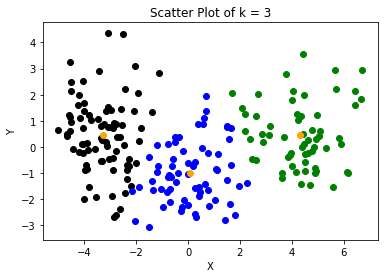

In [22]:
# because it can not plot at the beginnig, so adding this command
%matplotlib inline     
import matplotlib.pyplot as plt 
plt.scatter(x_point_one,y_point_one,c="black")
plt.scatter(x_point_two,y_point_two,c="green")
plt.scatter(x_point_thr,y_point_thr,c="blue")
for i in range(final_np.shape[0]):
    plt.scatter(final_np[i][0],final_np[i][1],c="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of k = 3")
plt.show()

## 2. SVM

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import classification_report

### 2-1 Data Preprocessing

In [24]:
attribute = ['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10','feature11','feature12','feature13','feature14','feature15','feature16','feature17','feature18',\
             'feature19','feature20','feature21','feature22','feature23','feature24','feature25','feature26','feature27','feature28','feature29','feature30','feature31','feature32f','eature33','feature34','label']
df_iono = pd.read_csv('ionosphere.data',names=attribute)

In [25]:
# df_iono

In [26]:
df_shuffled=df_iono.sample(frac=1).reset_index(drop=True)
df_iono_np = df_shuffled.to_numpy()
X = df_iono_np[:,:34]
y = df_iono_np[:,34]
# print(X.shape)
# print(y.shape)

### 2-2 Train-Test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print(X_train.shape)
# print(X_test.shape)

In [28]:
def calc_all(X, y, classifier, print_):
    #K-fold cross-validation with 𝐾=3
    confu_kf = [[0,0],[0,0]]
    classes = [0,1]
    output = ['0','1']


    accu_kf = 0
    recall_kf = 0
    prec_kf = 0

    for i,(train, test) in enumerate(KFold(n_splits=5).split(X)):
        kf_x_train = X[train]
        kf_y_train = y[train]
        kf_x_test = X[test]
        kf_y_test = y[test]

        clf =  classifier
        clf.fit(kf_x_train, kf_y_train.ravel())
        kf_y_pred = clf.predict(kf_x_test)

        accu_kf += metrics.accuracy_score(kf_y_test, kf_y_pred)
        confu_kf += metrics.confusion_matrix(kf_y_test, kf_y_pred)
        recall_kf += metrics.recall_score(kf_y_test, kf_y_pred, average = 'macro')
        prec_kf += metrics.precision_score(kf_y_test, kf_y_pred, average = 'macro')
        
    accu_kf = accu_kf/5


    if print_:
        print("accuracy: ", end = '')
        print(accu_kf)
        print('{:2s} {:9s}  {:6s}'.format('label', 'precision', 'recall'))
        for label in range(2):
            print(f"{output[label]:3s} {precision(label, confu_kf):9.3f} {recall(label, confu_kf):8.3f}")

        confu_kf = confu_kf/5
        print("confusion matrix:")
        print(confu_kf)
    
    return accu_kf

### 2-3 Linear kernel

              precision    recall  f1-score   support

           b       0.92      0.77      0.84        31
           g       0.91      0.97      0.94        75

    accuracy                           0.92       106
   macro avg       0.92      0.87      0.89       106
weighted avg       0.92      0.92      0.91       106

confusion matrix:
[[24  7]
 [ 2 73]]


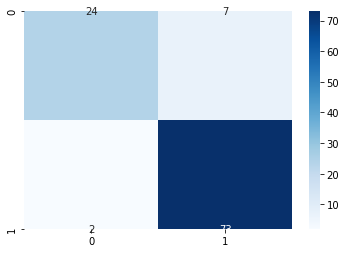

In [29]:
target=['0','1']
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True,cmap="Blues")

### 2-4 polynomial kernel with parameter search

In [30]:
degree = [2,3,4]
coef = [0.1*(i+1) for i in range(10)]
gamma = [0.1*(i+1) for i in range(10)]
best_score_poly = 0
best_c_poly = 0
best_gamma_poly = 0
best_d = 0
accu = 0
for c in coef:
    for d in degree:
        for g in gamma:
            clf = svm.SVC(kernel='poly', degree=d, C=c,gamma=g)
            accu = calc_all(X_train, y_train, clf, 0)
            if accu > best_score_poly:
                best_score_poly = accu
                best_c_poly = c
                best_gamma_poly = g
                best_d = d
# print(best_gamma_poly)
# print(best_d)
# print(best_c_poly)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           b       0.78      0.81      0.79        31
           g       0.92      0.91      0.91        75

    accuracy                           0.88       106
   macro avg       0.85      0.86      0.85       106
weighted avg       0.88      0.88      0.88       106

confusion matrix:
[[25  6]
 [ 7 68]]


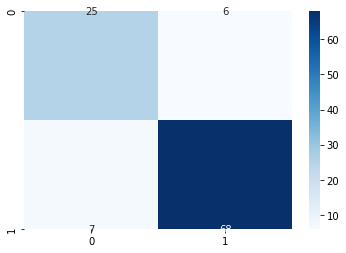

In [31]:
# predict
target=['0','1']
clf = svm.SVC(kernel='poly', degree=best_d, gamma=best_gamma_poly,coef0=best_c_poly)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True,cmap="Blues")

### 2-5 rbf kernel with parameter search

In [32]:
best_score_rbf = 0
best_gamma_rbf = 0
accu = 0
# for c in C_linear:

for g in gamma:
    clf = svm.SVC(kernel='rbf',gamma=g)
    accu = calc_all(X_train, y_train, clf, 0)
    if accu > best_score_rbf:
        best_score_rbf = accu
#             best_c_poly = c
        best_gamma_rbf = g

              precision    recall  f1-score   support

           b       0.90      0.87      0.89        31
           g       0.95      0.96      0.95        75

    accuracy                           0.93       106
   macro avg       0.92      0.92      0.92       106
weighted avg       0.93      0.93      0.93       106

confusion matrix:
[[27  4]
 [ 3 72]]


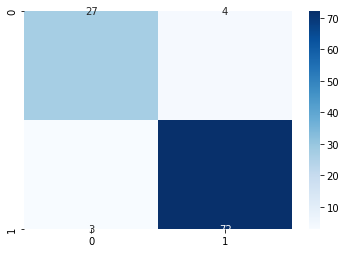

In [33]:
# predict
target=['0','1']
clf = svm.SVC(kernel='rbf',gamma=best_gamma_rbf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True,cmap="Blues")

### 2-6 Questions - Support Vector Machine

polynomial

In [34]:
# from tabulate import tabulate
degree = [2,3,4]
coef = [0.1*(i+3) for i in range(5)]
gamma = [0.1*(i+3) for i in range(5)]
total = []
for c in coef:
    for d in degree:
        for g in gamma:
            one_record=[]
            clf = svm.SVC(kernel='poly', degree=d, C=c,gamma=g)
            accu = calc_all(X_train, y_train, clf, 0)
            one_record.append(c)
            one_record.append(d)
            one_record.append(g)
            one_record.append(accu)
            total.append(one_record)

In [35]:
re = pd.DataFrame(total)
re = re.rename(columns={0: 'coeffient', 1: 'degree', 2: 'gamma', 3: 'accuracy'})

In [36]:
pd.set_option('display.max_rows', None)
display(re)

,coeffient,degree,gamma,accuracy
0,0.3,2,0.3,0.918367
1,0.3,2,0.4,0.914286
2,0.3,2,0.5,0.910204
3,0.3,2,0.6,0.914286
4,0.3,2,0.7,0.918367
5,0.3,3,0.3,0.906122
6,0.3,3,0.4,0.914286
7,0.3,3,0.5,0.922449
8,0.3,3,0.6,0.930612
9,0.3,3,0.7,0.918367


rbf

In [37]:
gamma = [0.1*(i+1) for i in range(10)]
total = []
for g in gamma:
    one_record=[]
    clf = svm.SVC(kernel='rbf',gamma=g)
    accu = calc_all(X_train, y_train, clf, 0)
    one_record.append(g)
    one_record.append(accu)
    total.append(one_record)

In [38]:
re_rbf = pd.DataFrame(total)
re_rbf = re_rbf.rename(columns={0: 'gamma', 1: 'accuracy'})
pd.set_option('display.max_rows', None)
display(re_rbf)

,gamma,accuracy
0,0.1,0.942857
1,0.2,0.955102
2,0.3,0.959184
3,0.4,0.951020
4,0.5,0.942857
5,0.6,0.938776
6,0.7,0.930612
7,0.8,0.938776
8,0.9,0.926531
9,1.0,0.918367


## 3. Compare and Conclusion

about K-means: 一開始在做 k-means 時是還沒有經過 PCA 降維的，發現經過降維過後所做出來的 Performance 相差不大，推測在這個資料集裡面，有兩個維度的資料可以代表整個 dataset

about SVM: 
    在做 SVM 使用 kernel = 'polynomial' 時，某些參數會跳出 "Precision is ill-defined and being set to 0.0 in labels with no predicted samples." 這樣的警告，我認為這是由於做出來的函數無法有效區分資料集，某些分類的結果中某個 label 都沒有被預測到，進而導致這樣的錯誤訊息
    kernel = rbf 所做出來的結果普遍高於 kernel = polynomial 的結果

feedback: 這次資料是第一次用 k-fold 與 grid search 的方式查找最佳參數，希望之後能在較複雜的資料集中學習使用 early stopping 的方式選擇最佳參數